# Homework 1
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

filePath="D3.csv"

df = pd.read_csv(filePath, index_col=False)

X_df = df.iloc[:, :-1]

data = df.to_numpy()

m = data.shape[0]

In [4]:
def gen_data(df: pd.DataFrame):
    X_df = df.iloc[:, :-1]
    data = X_df.to_numpy()
    
    Y = df.iloc[:, -1].to_numpy().reshape(-1,1)
    
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X, Y

def standardize(X: np.ndarray):
    X_no_X0 = X[:,1:]
    X0 = np.ones((data.shape[0], 1))
    means = np.broadcast_to(np.mean(X_no_X0, axis=0), (X_no_X0.shape))
    dev = np.broadcast_to(np.std(X_no_X0, axis=0), (X_no_X0.shape))
    new_x = np.divide(np.subtract(X_no_X0,means), dev)
    return np.hstack((X0, new_x))

def normalize(X: np.ndarray):
    X_no_X0 = X[:,1:]
    X0 = np.ones((data.shape[0], 1))
    mins = np.broadcast_to(np.min(X_no_X0, axis=0), (X_no_X0.shape))
    ranges = np.broadcast_to(np.max(X_no_X0, axis=0) - np.min(X_no_X0, axis=0), (X_no_X0.shape))
    new_x = np.divide(np.subtract(X_no_X0,mins), ranges)
    return np.hstack((X0, new_x))
    
X, Y = gen_data(df)
X_std = standardize(X)    
X_norm = normalize(X)


In [9]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = (1/ (2*m) ) * np.sum(sqrErrors)
    
    return J, predictions

In [10]:
def grad_desc(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, alpha: float, iterations: int):
    m = len(Y)
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        
        sum_deltas = (alpha/m) * X.T.dot(errors)
        
        theta -= sum_deltas
        
        sqrErrors = np.square(errors)
        cost_history[i]= (1/ (2*m) ) * np.sum(sqrErrors)
    
    return theta,cost_history

In [11]:
def print_model(X, Y, theta, name='Y'):
    
    cost, pred = compute_cost(X,Y,theta)
    
    model_str = ""
    
    for i in range(theta.shape[0]-1, -1, -1):
        if i == 0:
            model_str += f"{round(theta[i,0], 3)}"
            break
        model_str += f"{round(theta[i,0], 3)}*X{i} + "
    
    print(f"Model:\n    {name} = {model_str}") 
    print(f"    cost = {round(cost, 3)}")
    return pred

Model:
    y1 = -1.96*X1 + 5.725
    cost = 0.99
Model:
    y2 = 0.564*X1 + 0.72
    cost = 3.599
Model:
    y3 = -0.486*X1 + 2.784
    cost = 3.63




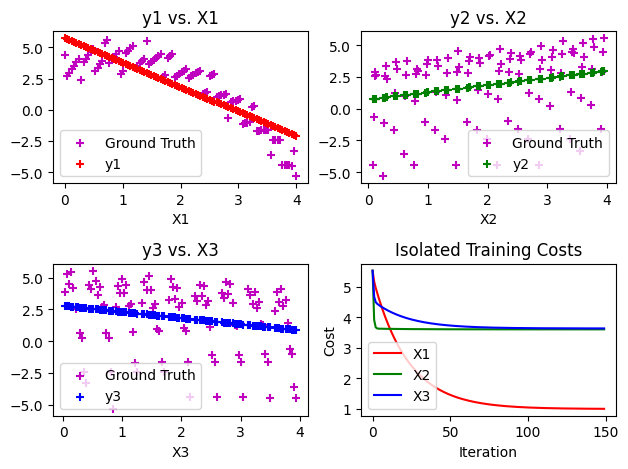

In [12]:
# Sequential Training
X_no_X0,Y = gen_data(df)

iterations = 150 
alpha = 0.1

fig, ax = plt.subplots(2,2, squeeze=True)

axes: np.ndarray[plt.Axes] = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
colors = ['r', 'g', 'b']

iters = range(iterations)
for i in range(1,4):
    
    X_i = np.hstack(( X_no_X0[:,0].reshape(-1,1), X_no_X0[:,i].reshape(-1,1) ))
    
    theta_col = np.zeros((2,1))
    theta_col, cost_history = grad_desc(X_i, Y, theta_col, alpha, iterations)
    
    pred = print_model(X_i, Y, theta_col, f"y{i}")
    pred = X_i.dot(theta_col)
    
    axes[i-1].scatter(X_no_X0[:,i], Y, label=f"Ground Truth", color='m', marker='+')
    axes[i-1].scatter(X_no_X0[:,i], pred, label=f"y{i}", color=colors[i-1], marker='+')
    axes[i-1].legend()
    axes[i-1].set_xlabel(f"X{i}")
    axes[i-1].set_title(f"y{i} vs. X{i}")
    
    axes[3].plot(iters, cost_history, label=f"X{i}", color=colors[i-1])

plt.title("Isolated Training Costs")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()

print('\n')
#print_model(X, Y, theta)
plt.tight_layout()

plt.show()


Model:
    y = -0.203*X3 + 0.603*X2 + -1.944*X1 + 4.89
    cost = 0.748


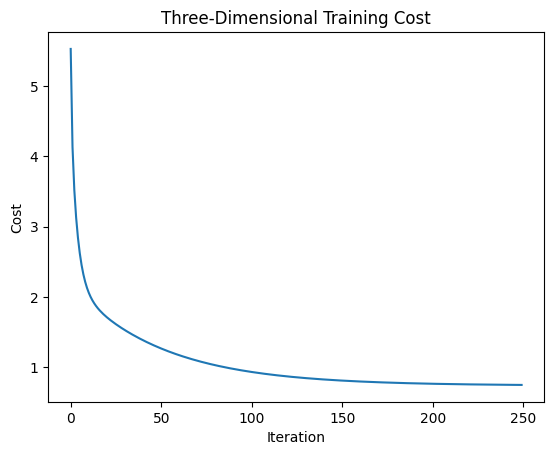

In [13]:
#Simultaneous Descent
theta = np.zeros((X_no_X0.shape[1], 1))

# 300 iters vs. 1000 iters only has a difference of .004 in cosst
iterations = 250
# Model still converges at max alpha
alpha = 0.1

theta, cost_history = grad_desc(X_no_X0, Y, theta, alpha, iterations)

plt.plot(range(iterations), cost_history)
plt.title("Three-Dimensional Training Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")

print_model(X_no_X0, Y, theta, 'y')
plt.show()

In [14]:
X_pred = np.array([
#   X0,1,2,3
    [1,1,1,1],
    [1,2,0,4],
    [1,3,2,1],
    ])
X_pred.dot(theta)

array([[3.34542262],
       [0.18869109],
       [0.06048419]])